In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
path = "../car_price_dataset.csv"
data = pd.read_csv(path)

In [7]:
print("Dataset shape:", data.shape)
data.head()

Dataset shape: (10000, 10)


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [9]:
print("Summary Statistics:")
display(data.describe())

Summary Statistics:


,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [10]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


In [11]:
target_column = 'Owner_Count'
print("\nTarget Value Distribution:")
print(data[target_column].value_counts())


Target Value Distribution:
Owner_Count
5    2036
1    2036
2    2020
3    1977
4    1931
Name: count, dtype: int64


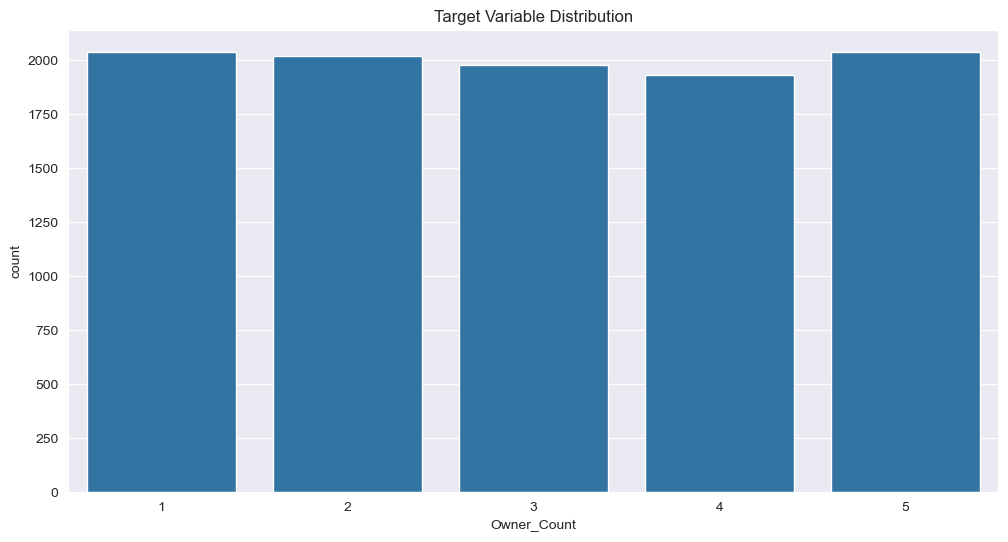

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x=target_column, data=data)
plt.title("Target Variable Distribution")
plt.show()

# Correlation Heatmap
### the correlation heatmap converts numerical correlation values into a color-coded grid, providing a clear and intuitive way to explore relationships between variables.

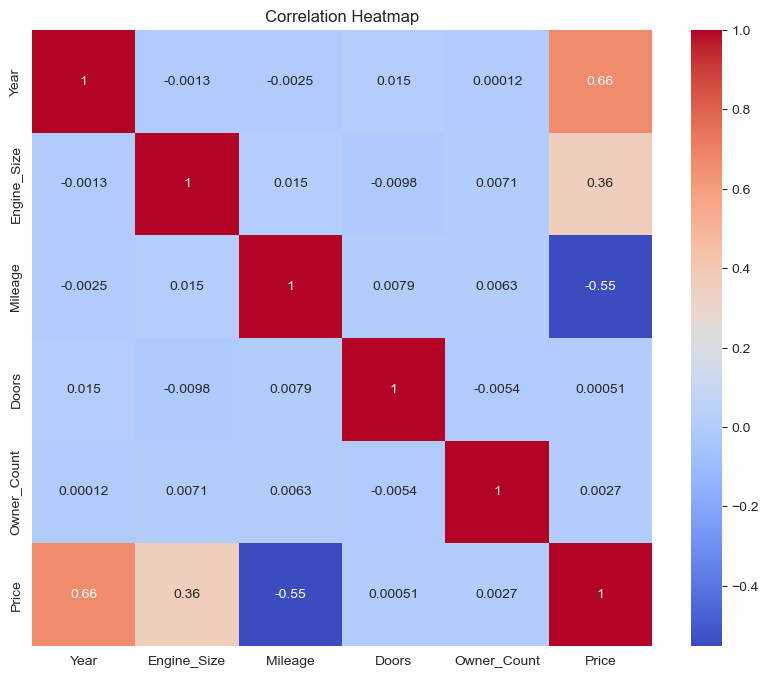

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Separate features and target

In [14]:
X = data.drop(columns=[target_column])
X = X.select_dtypes(include=[np.number])
y = data[target_column]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [17]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

In [18]:
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", acc_lr)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.2015

Classification Report:
               precision    recall  f1-score   support

           1       0.22      0.36      0.27       410
           2       0.18      0.31      0.23       403
           3       0.22      0.05      0.08       412
           4       0.15      0.04      0.06       351
           5       0.21      0.23      0.22       424

    accuracy                           0.20      2000
   macro avg       0.20      0.20      0.17      2000
weighted avg       0.20      0.20      0.18      2000



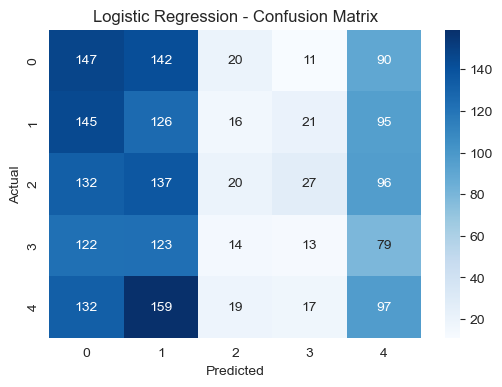

In [19]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# SVM

In [20]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(svm, param_grid, cv=5)
grid_svm.fit(X_train_scaled, y_train)
best_svm = grid_svm.best_estimator_

In [21]:
print("Best SVM Parameters:", grid_svm.best_params_)

Best SVM Parameters: {'C': 0.1, 'kernel': 'rbf'}


In [22]:
y_pred_svm = best_svm.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", acc_svm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.1955

Classification Report:
               precision    recall  f1-score   support

           1       0.21      0.38      0.27       410
           2       0.19      0.31      0.23       403
           3       0.20      0.00      0.00       412
           4       0.12      0.03      0.04       351
           5       0.20      0.23      0.22       424

    accuracy                           0.20      2000
   macro avg       0.18      0.19      0.15      2000
weighted avg       0.19      0.20      0.16      2000



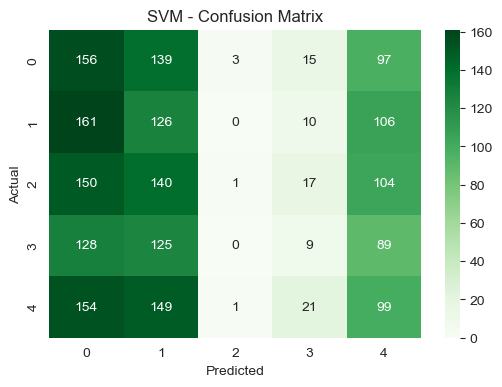

In [23]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# KNN (K- Nearest Neighbours)

In [24]:
param_grid_knn = {'n_neighbors': list(range(1, 21))}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_knn.fit(X_train_scaled, y_train)
best_knn = grid_knn.best_estimator_

In [25]:
print("Best KNN Parameters:", grid_knn.best_params_)

Best KNN Parameters: {'n_neighbors': 5}


In [26]:
y_pred_knn = best_knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", acc_knn)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.203

Classification Report:
               precision    recall  f1-score   support

           1       0.23      0.33      0.27       410
           2       0.19      0.22      0.20       403
           3       0.20      0.18      0.19       412
           4       0.17      0.15      0.16       351
           5       0.21      0.13      0.16       424

    accuracy                           0.20      2000
   macro avg       0.20      0.20      0.20      2000
weighted avg       0.20      0.20      0.20      2000



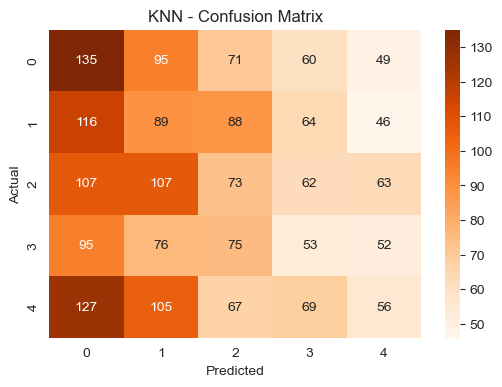

In [27]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges')
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Forests

In [28]:
param_grid_tree = {'max_depth': [None, 3, 5, 7, 10]}
dtree = DecisionTreeClassifier(random_state=42)
grid_tree = GridSearchCV(dtree, param_grid_tree, cv=5)
grid_tree.fit(X_train, y_train)  # For tree models, scaling is less crucial
best_tree = grid_tree.best_estimator_

In [29]:
print("Best Decision Tree Parameters:", grid_tree.best_params_)

Best Decision Tree Parameters: {'max_depth': 5}


In [30]:
y_pred_tree = best_tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", acc_tree)
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.206

Classification Report:
               precision    recall  f1-score   support

           1       0.20      0.87      0.33       410
           2       0.21      0.04      0.07       403
           3       0.23      0.03      0.05       412
           4       0.14      0.01      0.02       351
           5       0.22      0.06      0.09       424

    accuracy                           0.21      2000
   macro avg       0.20      0.20      0.11      2000
weighted avg       0.21      0.21      0.11      2000



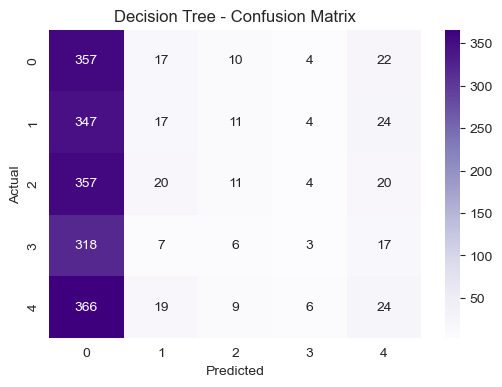

In [31]:
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6,4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Purples')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Comparision between models

In [32]:
models = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree']
accuracies = [acc_lr, acc_svm, acc_knn, acc_tree]

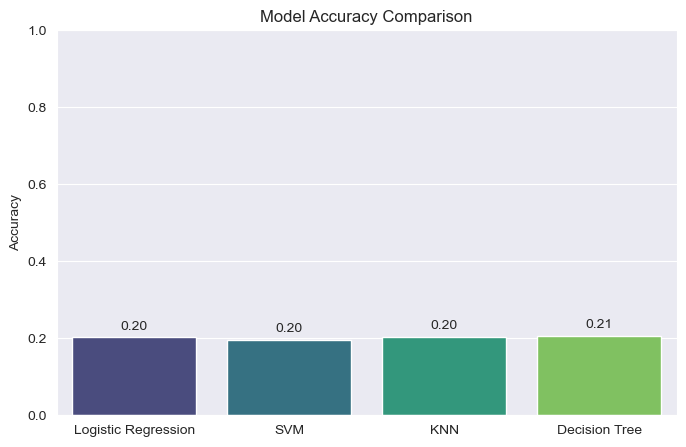

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
for index, value in enumerate(accuracies):
    plt.text(index, value+0.02, f"{value:.2f}", ha='center')
plt.show()

In [36]:
param_grid_forest = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Max depth of each tree
    'min_samples_split': [2, 5],  # Min samples to split a node
    'min_samples_leaf': [1, 2]  # Min samples per leaf node
}

In [37]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
grid_forest = GridSearchCV(rf, param_grid_forest, cv=5)
grid_forest.fit(X_train, y_train)  # Train different Random Forest models
best_forest = grid_forest.best_estimator_